## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [199]:
X.isnull().values.any()

False

In [200]:
object_type = (X.dtypes == "object").values.any()
#категориальных данных нет 

In [201]:
np.isnan(y).any()

False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [202]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [203]:
X_train = X_train[['alcohol', 'magnesium']]
X_test = X_test[['alcohol', 'magnesium']]

from sklearn.preprocessing import StandardScaler    

sc = StandardScaler()
X_train_scaled = pd.DataFrame(data=sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=sc.transform(X_test), columns=X_test.columns)

In [204]:
from sklearn.neighbors import KNeighborsClassifier

spisok = [1, 3, 5, 10, 15, 25]
knn_r_acc = []
neighbors_list = []

for i in spisok:
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
    neighbors_list.append(clf)
    train_score = np.mean(y_train==clf.predict(X_train_scaled))
    test_score = np.mean(y_test == clf.predict(X_test_scaled))
    knn_r_acc.append((i, round(train_score, 3), round(test_score, 3)))

df = pd.DataFrame(knn_r_acc, columns=['NN','Train','Test'])
print(df)
# https://towardsdatascience.com/k-nearest-neighbors-94395f445221

   NN  Train   Test
0   1  0.992  0.667
1   3  0.839  0.648
2   5  0.806  0.685
3  10  0.806  0.704
4  15  0.782  0.685
5  25  0.726  0.685


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [205]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [147]:
from sklearn import datasets
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:4

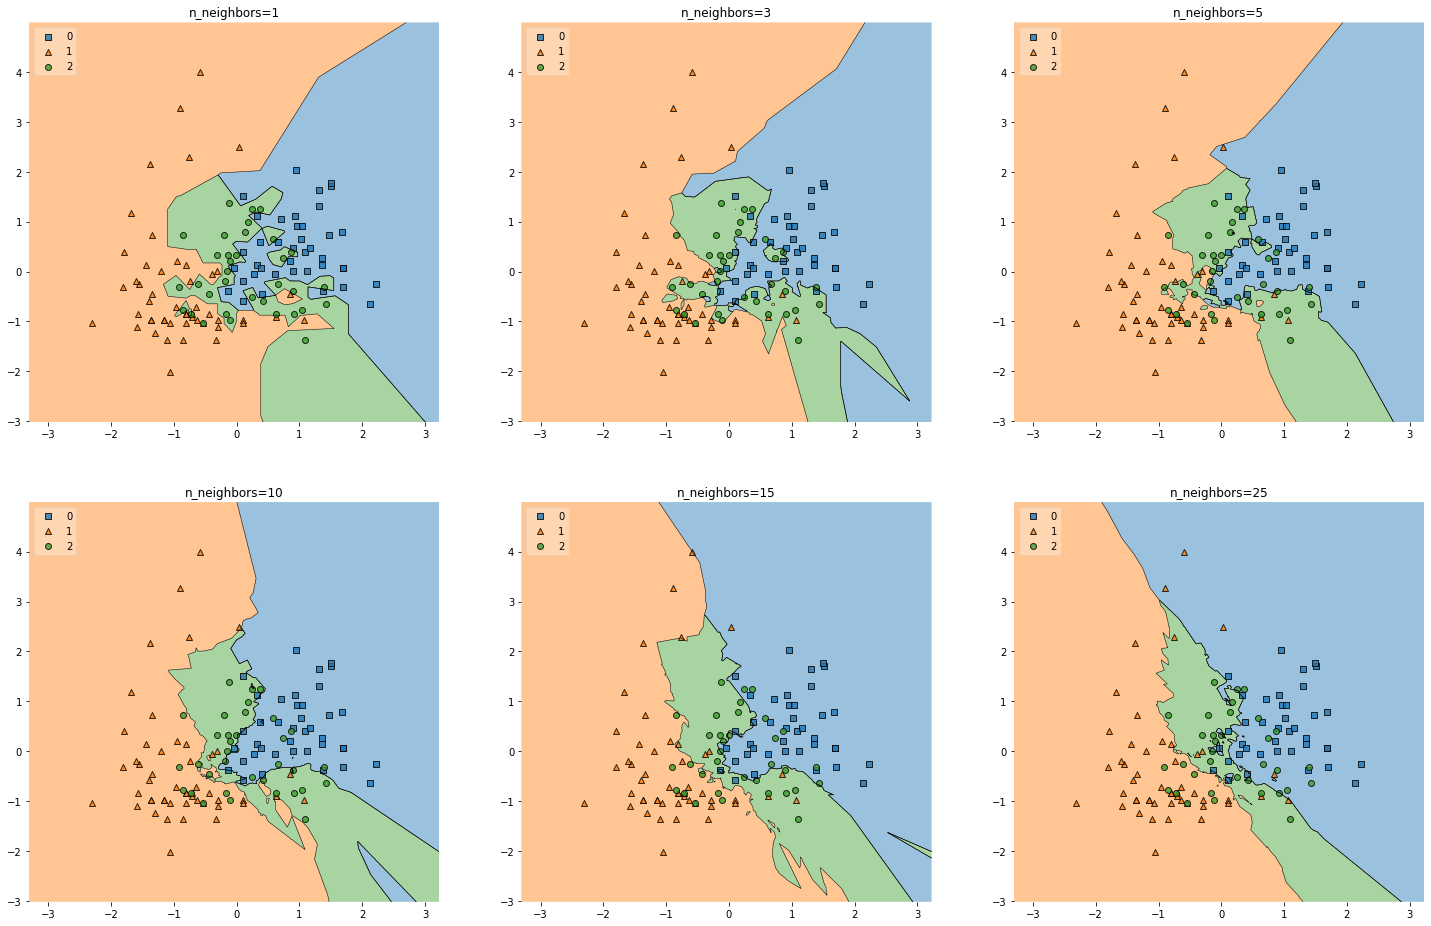

In [148]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(25,25))

labels = ['n_neighbors=1', 'n_neighbors=3', 'n_neighbors=5', 'n_neighbors=10', 'n_neighbors=15', 'n_neighbors=25']
for clf, lab, grd in zip(neighbors_list,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    #clf.fit(X_train_scaled.to_numpy(), y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_scaled.to_numpy(), y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Судя по табличке в пункте 1.3, можно сделать вывод о том, что самое высокое значение accuracy при 10 ближайших соседях. Действительно, если посмотреть на картинку, то при 1, 3 и 5 соседях области сильно рванные, что свидетельствует о переобучении модели, тогда как при 15 и 25 соседях области более "сглаженные" и уже не вбирают в себя объекты нужного класса. 

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

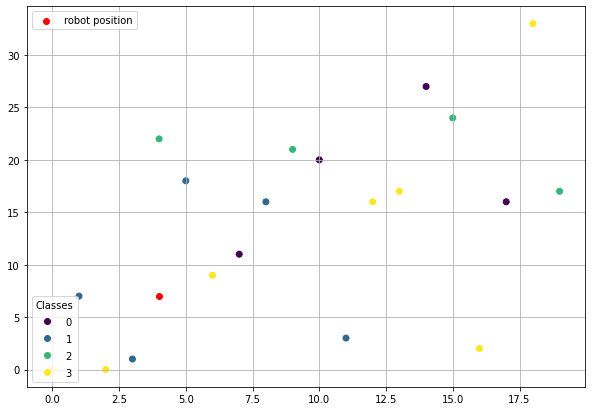

In [206]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [207]:
from sklearn.neighbors import KNeighborsClassifier

In [208]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        self.k = k
        self.initial_position = initial_position
        self.landmarks = landmarks
        self.classes = classes

        # Store the history of movements
        self.trajectory = [self.initial_position, ]

        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors= self.k).fit(self.landmarks, self.classes).predict(self.trajectory[-1].reshape(1, -1))
        

        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        s = np.random.binomial(1, 0.2)
        if s == 1:
          self.trajectory.append(self.trajectory[-1] + np.array([1, 0]))
        else:
          a = int(self.knn)
          self.trajectory.append(self.trajectory[-1] + self.mapping[a])

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [209]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3,
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

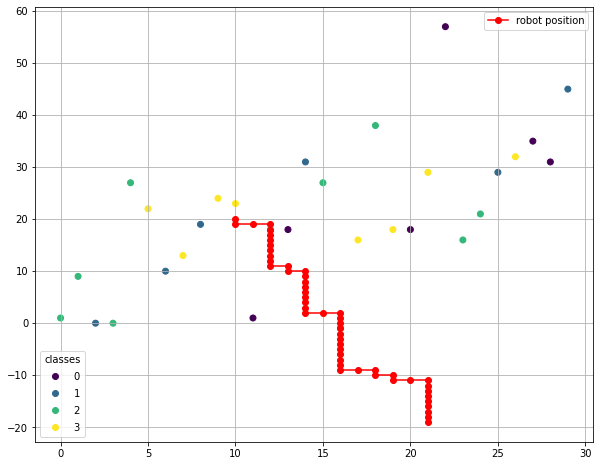

In [210]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

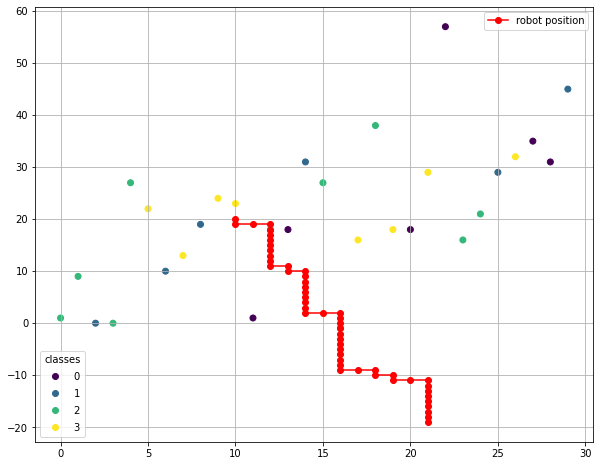

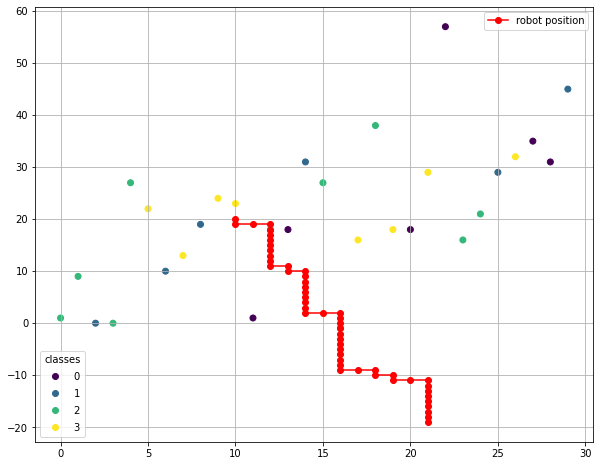

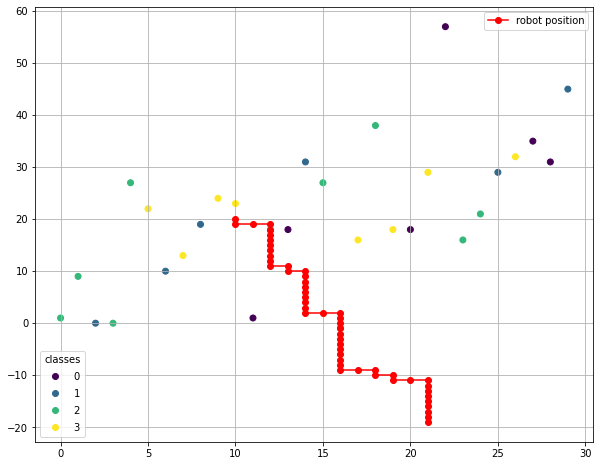

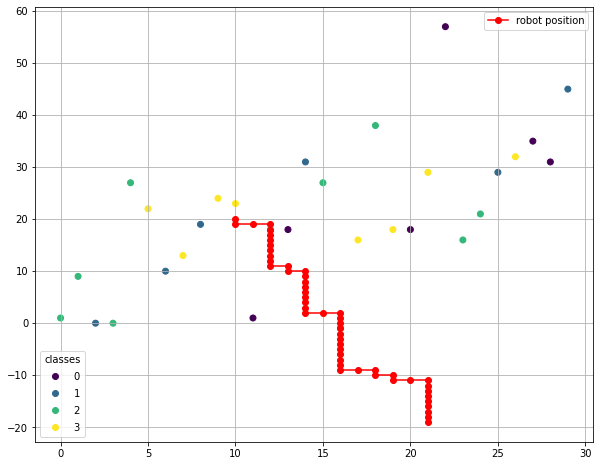

In [211]:
x = np.arange(30)
for i in [5, 10, 15, 20]:
  conduct_experiment(x, mean = 3, std = 10, k = i, n_movements = 50)

Можно заметить, что при 4 выбранных k-соседей, траектория робота остается идентичной во всех случаях. Возможно, причина заключается в том, что классы назначаются меткам рандомно, нет некой "сгруппированности", классы меток рассеяны, поэтому число соседей на движение едва ли влияет. Напротив, если бы классы определялись осознанно, то, возможно, траектория движения менялась бы в зависимости от числа соседей более "направленно" и конкретно.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [212]:
!wget https://raw.githubusercontent.com/smnvkaty/task_3/main/diamonds.csv
data = pd.read_csv('diamonds.csv')
data.head(5)

--2022-03-23 19:47:10--  https://raw.githubusercontent.com/smnvkaty/task_3/main/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3192560 (3.0M) [text/plain]
Saving to: ‘diamonds.csv.1’

diamonds.csv.1      100%[===================>]   3.04M  --.-KB/s    in 0.07s   

2022-03-23 19:47:10 (46.3 MB/s) - ‘diamonds.csv.1’ saved [3192560/3192560]



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [213]:
data.isnull().values.any().any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [214]:
data_1 = data.drop(['Unnamed: 0'], axis=1)


In [215]:
data_1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

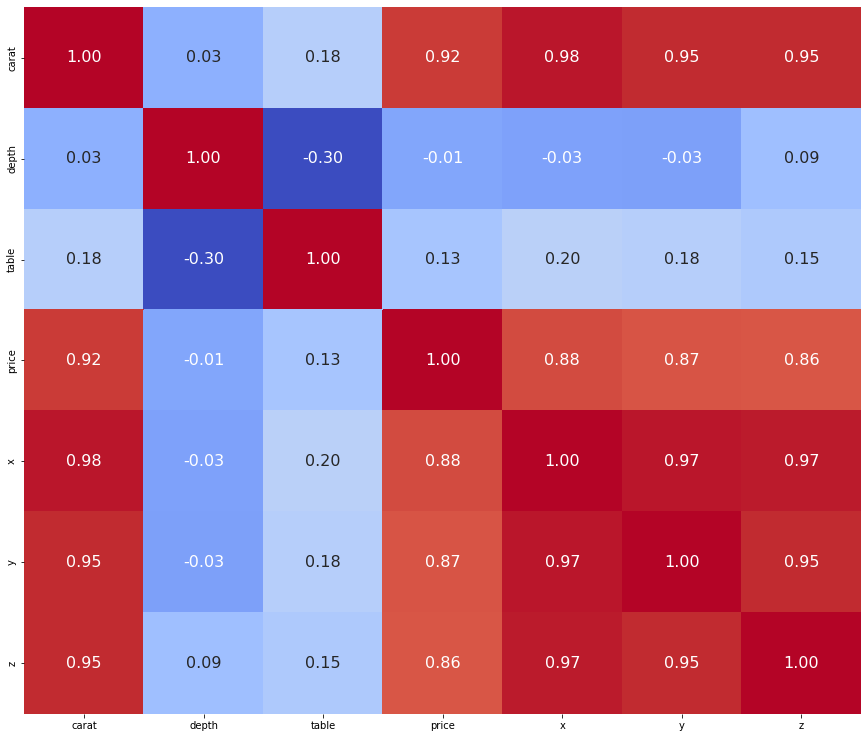

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,13))
sns.heatmap(data_1.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

Больше всего со значением цены коррелируют переменные carat и x, y, z (размер).

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [217]:
data_dum = pd.get_dummies(data_1, drop_first=True)
data_dum.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [218]:
data_X = data_dum.drop(['price'], axis=1)
data_y = data_dum['price']
from sklearn.model_selection import train_test_split
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=0)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [219]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
st_x= StandardScaler()    

data_X_train = pd.DataFrame(data=st_x.fit_transform(data_X_train) , columns=data_X_train.columns)
data_X_test = pd.DataFrame(data=st_x.transform(data_X_test), columns=data_X_test.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [220]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [223]:
lr = LinearRegression().fit(data_X_train,data_y_train)
print ("Train: {}".format(mean_squared_error(data_y_train, lr.predict(data_X_train))))
print ("Test: {}".format(mean_squared_error(data_y_test, lr.predict(data_X_test))))

Train: 1284661.862119126
Test: 1259159.1137946642


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [224]:
model = LinearRegression()
model.fit(data_X_train, data_y_train)
print(model.coef_)
# https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/


[ 5.27811998e+03 -9.42669361e+01 -6.56183723e+01 -1.05002476e+03
 -2.64737971e+00 -4.05686230e+01  1.55923708e+02  3.89952109e+02
  3.14449843e+02  2.91047679e+02 -6.95800253e+01 -9.09479485e+01
 -1.82693620e+02 -3.39522613e+02 -4.30763476e+02 -5.17728075e+02
  9.57549314e+02  1.57320442e+03  1.01623724e+03  1.64046365e+03
  1.79084281e+03  1.26334765e+03  1.44548292e+03]


На порядок превышают => больше, чем в 10 и т.д. раз: carat, x, clarity_SI1, clarity_SI2, clarity_VS1,	clarity_VS2,	clarity_VVS1, clarity_VVS2.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [225]:
lasso = Lasso(10.0).fit(data_X_train, data_y_train)
print(lasso.coef_)

[4784.58223808 -100.46417419  -76.80709351 -603.5249138    -0.
  -40.09153589   32.15914057  184.43593078  128.3877937   120.81319164
   -0.          -24.42703051 -105.82444228 -267.91959723 -359.19659407
 -459.60473492  655.3063347   869.81778569  406.58029782 1046.99977323
 1103.88044864  846.4660105   963.06160789]


In [226]:
ridge = Ridge(10.0).fit(data_X_train, data_y_train)
print(ridge.coef_)

[ 5.24003259e+03 -9.24621010e+01 -6.57910975e+01 -1.00868974e+03
 -4.49021066e+00 -4.40571340e+01  1.56659289e+02  3.91313955e+02
  3.15641410e+02  2.92535205e+02 -6.91760923e+01 -9.07485383e+01
 -1.82171492e+02 -3.38702374e+02 -4.29443100e+02 -5.16473294e+02
  9.45726951e+02  1.54418240e+03  9.91592270e+02  1.61635507e+03
  1.76271375e+03  1.24679513e+03  1.42605709e+03]


При регуляризации Ridge параметры изменились несущественно (в отличие от Lasso,), однако и в Lasso, и в Ridge регрессиях сохраняются признаки, коэффициенты которых на порядок превышают оценки прочих вещественных переменных. Так что, вероятно, проблема мультиколлинеарности не особо сильно проявлялась в изначальной регрессии.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [227]:
from sklearn.feature_selection import SelectFromModel

spisok_1 = list()
spisok_2 = list()
for i in [0.1, 1, 10, 100, 200]:
  lasso = Lasso(i).fit(data_X_train,data_y_train)
  spisok_1.append(np.linalg.norm(lasso.coef_))

for i in [0.1, 1, 10, 100, 200]:
  ridge = Ridge(i).fit(data_X_train,data_y_train)
  spisok_2.append(np.linalg.norm(ridge.coef_))

df = pd.DataFrame({'Alpha': [0.1, 1, 10, 100, 200], 'Lasso': spisok_1, 'Ridge': spisok_2})
df

,Alpha,Lasso,Ridge
0,0.1,6616.781521,6629.490572
1,1.0,6496.863161,6623.088919
2,10.0,5392.040825,6560.126323
3,100.0,3872.588791,6019.933299
4,200.0,3581.380183,5560.528065


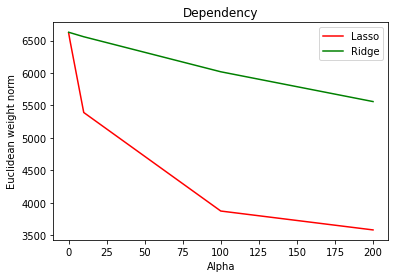

In [228]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2.0*np.pi, 101)

xnumbers = np.linspace(0, 7, 15)
ynumbers = np.linspace(-1, 1, 11)

x = df['Alpha']
y = df['Lasso']
z = df['Ridge']

plt.plot(x, y, color='r', label='Lasso') 
plt.plot(x, z, color='g', label='Ridge')

plt.xlabel("Alpha")
plt.ylabel("Euclidean weight norm")
plt.title("Dependency")
plt.legend()

plt.show()

Lasso-регрессия сильнее штрафует за большие веса => зануляет коэффициенты с высокими значениями, тем самым, способствуя отбору наиболее информативных признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [229]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, alphas = [0.1, 1, 10, 100, 200]).fit(data_X_train, data_y_train)
spisok = []

for i in reg.mse_path_:
  spisok.append(np.mean(i))

x = spisok.index(min(spisok))
print(reg.alphas_[x])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139598866.836403, tolerance: 48309472.87280814
  positive,


1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [230]:
lasso = Lasso(1.0).fit(data_X_train, data_y_train)
print(lasso.coef_)

[ 5228.56086133   -94.81899154   -66.71608979 -1007.19846437
    -0.           -40.84217731   143.62017829   369.55250696
   295.99492832   274.12993973   -62.50195326   -84.22618828
  -174.9291816   -332.2982653   -423.54470024  -511.86764625
   926.94240145  1501.97936613   954.50436151  1580.37352146
  1721.28955256  1221.13867319  1396.64080979]


Неинформативный признак: y - width mm
Наиболее информативные признаки: carat, x - length mm, clarity_IF,clarity_SI1, clarity_SI2, clarity_VS1, clarity_VS2,	clarity_VVS1	clarity_VVS2.
Вероятно, ключевыми характеристиками, влияющими на цену бриллианта являются вес в каратах, длина в мм и чистота.


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [231]:
print ("Train: {}".format(mean_squared_error(data_y_train, lasso.predict(data_X_train))))
print ("Test: {}".format(mean_squared_error(data_y_test, lasso.predict(data_X_test))))

Train: 1285255.5474481208
Test: 1261270.768756434


3.7: Test: 1259159.1137946642

Ошибка при регуляризации Lasso на тесте увеличилась -> модель линейной регрессии лучше. Возможно, это связано с тем, что проблема мультиколлиниарности не возникала, а большие веса - нормальное явление в рамках модели, однако за счет большого штрафа Lasso accuracy предсказаний снижается.

